# Regressão Linear Múltipla

## Hands-On: Multicolinearidade

In [1]:
# Pacotes de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de data science
import statsmodels.api as sm

### Importação da base de dados

In [2]:
df = pd.read_csv('base_funcionarios_v3.csv', 
                 sep=',', 
                 index_col=0)
df.shape

(46, 4)

In [3]:
df.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira
0,5517.4,3,3,9.777079
1,6399.9,4,6,3.765998
2,6206.7,6,3,7.926264
3,6060.6,4,5,2.233497
4,6122.7,2,9,26.821842


### Análise Exploratória dos Dados

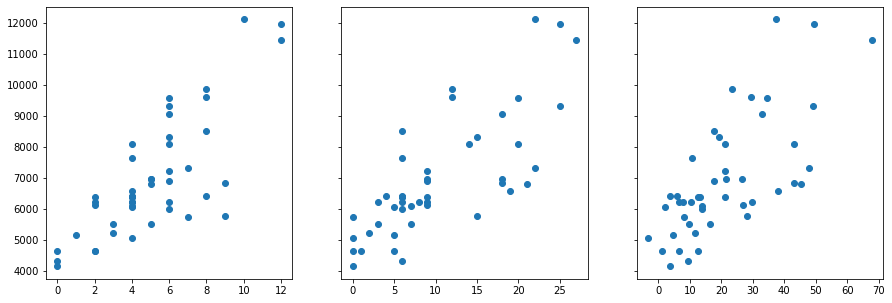

In [4]:
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3,sharey=True,figsize=(15,5))
ax1.scatter(df['Anos_Educ_Superior'],df['Salario']);
ax2.scatter(df['Tempo_Empresa'],df['Salario']);
ax3.scatter(df['Tempo_de_Carreira'],df['Salario']);

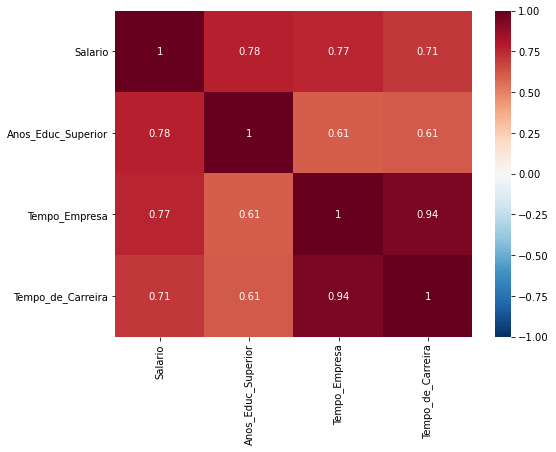

In [5]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),
            cmap='RdBu_r',
            vmin=-1, vmax=1,
            annot=True);

### Ajuste do Modelo de Regressão usando o Statsmodels (Pacote de Modelos Estatísticos)

In [6]:
# Variável resposta
y = df['Salario']

# Variáveis explicativas
df['intercepto'] = 1 
x = df[['intercepto',
        'Anos_Educ_Superior',
        'Tempo_Empresa',
        'Tempo_de_Carreira']]

In [7]:
# Ajusta o modelo e retorna os resultados
modelo = sm.OLS(y , x)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     41.61
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.21e-12
Time:                        09:43:10   Log-Likelihood:                -380.92
No. Observations:                  46   AIC:                             769.8
Df Residuals:                      42   BIC:                             777.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4053.7618    308

Considerando que relação de causalidade entre **Salário** e **Tempo_Empresa**, e **Salário** e **Tempo_de_Carreira** são semelhantes, e a dificuldade de obter ambas também é parecida, optou-se por remover a variável **Tempo_de_Carreira** por apresentar **maior p-valor** no teste de hipóteses do respectivo coeficiente.

### Excluindo a variável **Tempo de Carreira**

In [8]:
# Variável resposta
y = df['Salario']

# Variáveis explicativas
df['intercepto'] = 1 
x = df[['intercepto',
        'Anos_Educ_Superior',
        'Tempo_Empresa']]

In [9]:
# Ajusta o modelo e retorna os resultados
modelo = sm.OLS(y , x)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     61.17
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           2.66e-13
Time:                        09:43:10   Log-Likelihood:                -381.67
No. Observations:                  46   AIC:                             769.3
Df Residuals:                      43   BIC:                             774.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4056.0591    309

### Interpretação dos Coeficientes

**Intercepto ou $\beta_0$**: Salário médio de um colaborador sem educação superior e recém chegado na empresa é de `R$4.056,06`.<br>
**$\beta_1$** x Anos de Educação Superior: Cada ano adicional de educação superior, mantendo tempo de empresa constante, gera um aumento médio de `R$335,39`.<br>
**$\beta_2$** x Tempo de Empresa: Cada ano adicional de tempo de empresa, mantendo os anos de educação superior constante, gera um aumento médio de `R$117,66`.